In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate


[5.95244955 0.3912284 ]


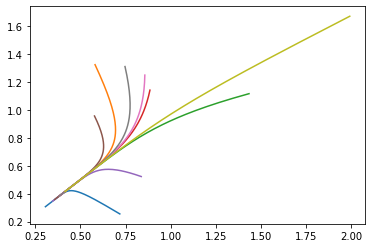

In [5]:
def Hello(X, t=0):
    return [np.tanh(X[1]) - X[0], np.tanh(X[0]) - X[1]]
X0 = 10*np.random.rand(2)
print(X0)
t = np.linspace(0, 10, 200)
for i in range(1,10):
    X0 = 2*np.random.rand(2)
    X = integrate.odeint(Hello, X0, t)
    plt.plot(X[:,0], X[:,1])

/Users/andrew/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in arctanh
  
/Users/andrew/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in arctanh
  
/Users/andrew/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in arctanh
/Users/andrew/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in arctanh


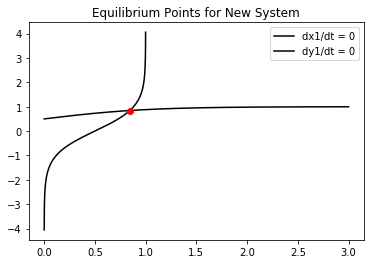

In [30]:
def lines(x):
    a = 2
    b = 2
    k = 1
    l = 1
    g = 1
    h = 1
    return np.arctanh(a*x-g)/k, (np.tanh(l*x)+h)/b
x = np.linspace(0, 3, 10000)
line1, line2 = lines(x)
def lines2(x):
    a = 2
    b = 2
    k = 3
    l = 3
    g = 1
    h = 1
    return np.arctanh(a*x-g)/k, (np.tanh(l*x)+h)/b
line3, line4 = lines2(x)
plt.title("Equilibrium Points for New System")
plt.plot(x, line1, color = 'black', label = "dx1/dt = 0")
plt.plot(x, line2, color= 'black', label = "dy1/dt = 0")
#plt.plot(x, line3, color='black', label = "dx2/dt = 0")
#plt.plot(x, line4, color='black', label = "dy2/dt = 0")
plt.legend()
idx = np.argwhere(np.diff(np.sign(line2 - line1))).flatten()
plt.plot(line1[idx], line2[idx], 'ro')
plt.savefig('tanh_eq1.png')
plt.show()
#plt.plot(np.linspace(0,5,100), line2(np.linspace(0,5,100)))

In [ ]:
def line1(x):
    return np.arctanh(a*x-g)/k
def line2(x):
    return (np.tanh(l*x)+h)/b
a = 2
b = 2
k = 3
l = 3
g = 1
h = 1
plt.plot(np.linspace(0,5,100), line1(np.linspace(0,5,100)))
plt.plot(np.linspace(0,5,100), line2(np.linspace(0,5,100)))
plt.savefig('tanh_eq2.png')

[5.0, 5.0]
[4.04954648 0.90985014]
[8.6818792  0.72345263]
[7.03652191 7.40916193]
[2.05038795 3.22978827]
[8.71352813 1.63147812]
[5.92780852 4.08792565]
[3.52521316 2.16824395]
[4.77942171 2.91392956]
[3.01615365 3.78371793]
[1.73080529 9.76521313]


(0, 11.68881789937616)

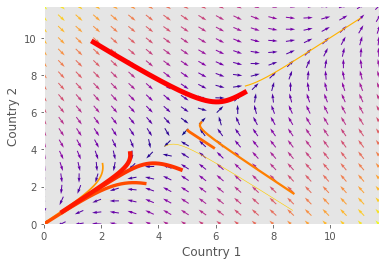

In [21]:
## import numpy as np
from matplotlib import pyplot as plt
from scipy import integrate
 
# I'm using this style for a pretier plot, but it's not actually necessary
plt.style.use('ggplot')
 
"""
This is to ignore RuntimeWarning: invalid value encountered in true_divide
I know that when my populations are zero there's some division by zero and
the resulting error terminates my function, which I want to avoid in this case.
"""
#np.seterr(divide='ignore', invalid='ignore')
 
# These are the parameter values we'll be using
a = 2
b = 2
k = 3
l = 3
g = -5
h = -5

# Define the system of ODEs
# x[0] is country 1, x[1] is country 2
def Richardson(X, t=0):
    return ([k*X[1] - a*X[0] + g,
            l*X[0] - b*X[1] + h ])
 
# Define equilibrium point
EQ = ([(g*b+k*h)/(a*b-k*l), (h*a+l*g)/(a*b-k*l)])
print(EQ)
"""
I need to define the possible values my initial points will take as they
relate to the equilibrium point. In this case I chose to plot 10 trajectories
ranging from 0.1 to 5
"""
values = np.linspace(0.1, 10, 10)
# I want each trajectory to have a different color
vcolors = plt.cm.autumn_r(np.linspace(0.1, 1, len(values)))

# Open figure
f = plt.figure()
"""
I need to define a range of time over which to integrate the system of ODEs
The values don't really matter in this case because our system doesn't have t
on the right hand side of dx/dt and dy/dt, but it is a necessary input for
integrate.odeint.
"""
t = np.linspace(0, 1, 1000)
# Plot trajectories by looping through the possible values

#for i in range(1,11):
for v,col in zip(values, vcolors):
    # Starting point of each trajectory
    X0 = 10*np.random.rand(2)
    print(X0)
    #X0 = [E*v for E in EQ]
    # Integrate system of ODEs to get x and y values
    X = integrate.odeint(Richardson, X0, t)
    
    # Plot each trajectory
    plt.plot( X[:,0], X[:,1],
            lw=0.5*v,
            color=col,
            # Assign starting point to trajectory label
            label='X0=(%.f, %.f)' % ( X0[0], X0[1]) )
"""
To plot the direction fields we first need to define a grid in order to
compute the direction at each point
"""
# Get limits of trajectory plot
ymax = plt.ylim(ymin=0)[1]
xmax = plt.xlim(xmin=0)[1]
# Define number of points
nb_points = 20
# Define x and y ranges
x = np.linspace(0, xmax, nb_points)
y = np.linspace(0, ymax, nb_points)
# Create meshgrid
X1 , Y1 = np.meshgrid(x,y)
# Calculate growth rate at each grid point
DX1, DY1 = Richardson([X1, Y1])
# Direction at each grid point is the hypotenuse of the prey direction and the
# predator direction.
M = (np.hypot(DX1, DY1))
# This is to avoid any divisions when normalizing
M[ M == 0] = 1.
# Normalize the length of each arrow (optional)
DX1 /= M
DY1 /= M
 
#plt.title('Trajectories and direction fields')
"""
This is using the quiver function to plot the field of arrows using DX1 and
DY1 for direction and M for speed
"""
Q = plt.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=plt.cm.plasma)
plt.xlabel('Country 1')
plt.ylabel('Country 2')
#plt.legend(bbox_to_anchor=(1.05, 1.0))
plt.grid()
plt.xlim(0, xmax)
plt.ylim(0, ymax)
#plt.savefig("trajectories2.png", bbox_inches ='tight')

In [62]:
def Richardson_model_exp(a, b, k, l, g, h, lam):
    import numpy as np
    from matplotlib import pyplot as plt
    from scipy import integrate
 
    # I'm using this style for a pretier plot, but it's not actually necessary
    plt.style.use('ggplot')
 
    """
    This is to ignore RuntimeWarning: invalid value encountered in true_divide
    I know that when my populations are zero there's some division by zero and
    the resulting error terminates my function, which I want to avoid in this case.
    """
    np.seterr(divide='ignore', invalid='ignore')
 
    # These are the parameter values we'll be using
    #a = 2
    #b = 2
    #k = 5
    #l = 5
    #g = 15
    #h = 15
    #lam = 3
    
    # Define the system of ODEs
    # x[0] is country 1, x[1] is country 2
    def Richardson(X, t=0):
        return ([k*X[1] + lam*(1-np.exp(a*X[0]/lam)) + g,
                l*X[0] + lam*(1-np.exp(b*X[1]/lam)) + h ])
 
    # Define equilibrium point
    #EQ = ([(g*b+k*h)/(a*b-k*l), (h*a+l*g)/(a*b-k*l)])
 
    """
    I need to define the possible values my initial points will take as they
    relate to the equilibrium point. In this case I chose to plot 10 trajectories
    ranging from 0.1 to 5
    """
    values = np.linspace(0.1, 10, 10)
    # I want each trajectory to have a different color
    vcolors = plt.cm.autumn_r(np.linspace(0.1, 1, len(values)))
 
    # Open figure
    f = plt.figure()
    """
    I need to define a range of time over which to integrate the system of ODEs
    The values don't really matter in this case because our system doesn't have t
    on the right hand side of dx/dt and dy/dt, but it is a necessary input for
    integrate.odeint.
    """
    t = np.linspace(0, 1, 1000)
 
    # Plot trajectories by looping through the possible values
    for v, col in zip(values, vcolors):
        # Starting point of each trajectory
        X0 = 10*np.random.rand(2)
        #X0 = [E*v for E in EQ]
        # Integrate system of ODEs to get x and y values
        X = integrate.odeint(Richardson, X0, t)
        # Plot each trajectory
        plt.plot( X[:,0], X[:,1],
                # Different line width for different trajectories (optional)
                lw=0.5*5,
                # Different color for each trajectory
                color=col,
                # Assign starting point to trajectory label
                label='X0=(%.f, %.f)' % ( X0[0], X0[1]) )
    """
    To plot the direction fields we first need to define a grid in order to
    compute the direction at each point
    """
    # Get limits of trajectory plot
    ymax = plt.ylim(ymin=0)[1]
    xmax = plt.xlim(xmin=0)[1]
    # Define number of points
    nb_points = 20
    # Define x and y ranges
    x = np.linspace(0, xmax, nb_points)
    y = np.linspace(0, ymax, nb_points)
    # Create meshgrid
    X1 , Y1 = np.meshgrid(x,y)
    # Calculate growth rate at each grid point
    DX1, DY1 = Richardson([X1, Y1])
    # Direction at each grid point is the hypotenuse of the prey direction and the
    # predator direction.
    M = (np.hypot(DX1, DY1))
    # This is to avoid any divisions when normalizing
    M[ M == 0] = 1.
    # Normalize the length of each arrow (optional)
    DX1 /= M
    DY1 /= M
 
    plt.title('Trajectories and direction fields')
    """
    This is using the quiver function to plot the field of arrows using DX1 and
    DY1 for direction and M for speed
    """
    Q = plt.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=plt.cm.plasma)
    plt.xlabel('Country 1')
    plt.ylabel('Country 2')
    #plt.legend(bbox_to_anchor=(1.05, 1.0))
    plt.grid()
    plt.xlim(0, xmax)
    plt.ylim(0, ymax)
    #plt.savefig("unstable_exp.png")
    plt.show()

In [65]:
#stable = Richardson_model_exp(3, 3, 2, 2, 10, 10, 10)
#disarm = Richardson_model_exp(5, 5, 2, 2, -1, -1, 10)
#unstable = Richardson_model_exp(2, 2, 3, 3, 3, 3, 10)

In [37]:
def Richardson_model_tanh(a, b, k, l, g, h):
    import numpy as np
    from matplotlib import pyplot as plt
    from scipy import integrate
 
    # I'm using this style for a pretier plot, but it's not actually necessary
    plt.style.use('ggplot')
 
    """
    This is to ignore RuntimeWarning: invalid value encountered in true_divide
    I know that when my populations are zero there's some division by zero and
    the resulting error terminates my function, which I want to avoid in this case.
    """
    np.seterr(divide='ignore', invalid='ignore')
 
    # These are the parameter values we'll be using
    #a = 2
    #b = 2
    #k = 5
    #l = 5
    #g = 15
    #h = 15
    #lam = 3
    
    # Define the system of ODEs
    # x[0] is country 1, x[1] is country 2
    def Richardson(X, t=0):
        return ([np.tanh(X[1]) - a*X[0] + g,
                np.tanh(X[0]) - b*X[1] + h ])
 
    # Define equilibrium point
    #EQ = ([(g*b+k*h)/(a*b-k*l), (h*a+l*g)/(a*b-k*l)])
 
    """
    I need to define the possible values my initial points will take as they
    relate to the equilibrium point. In this case I chose to plot 10 trajectories
    ranging from 0.1 to 5
    """
    values = np.linspace(0.1, 10, 10)
    # I want each trajectory to have a different color
    vcolors = plt.cm.autumn_r(np.linspace(0.1, 1, len(values)))
 
    # Open figure
    f = plt.figure()
    """
    I need to define a range of time over which to integrate the system of ODEs
    The values don't really matter in this case because our system doesn't have t
    on the right hand side of dx/dt and dy/dt, but it is a necessary input for
    integrate.odeint.
    """
    t = np.linspace(0, 1, 1000)
 
    # Plot trajectories by looping through the possible values
    for v, col in zip(values, vcolors):
        # Starting point of each trajectory
        X0 = 2*np.random.rand(2)
        #X0 = [E*v for E in EQ]
        # Integrate system of ODEs to get x and y values
        X = integrate.odeint(Richardson, X0, t)
        # Plot each trajectory
        plt.plot( X[:,0], X[:,1],
                # Different line width for different trajectories (optional)
                lw=0.5*5,
                # Different color for each trajectory
                color=col,
                # Assign starting point to trajectory label
                label='X0=(%.f, %.f)' % ( X0[0], X0[1]) )
    """
    To plot the direction fields we first need to define a grid in order to
    compute the direction at each point
    """
    # Get limits of trajectory plot
    ymax = plt.ylim(ymin=0)[1]
    xmax = plt.xlim(xmin=0)[1]
    # Define number of points
    nb_points = 20
    # Define x and y ranges
    x = np.linspace(0, xmax, nb_points)
    y = np.linspace(0, ymax, nb_points)
    # Create meshgrid
    X1 , Y1 = np.meshgrid(x,y)
    # Calculate growth rate at each grid point
    DX1, DY1 = Richardson([X1, Y1])
    # Direction at each grid point is the hypotenuse of the prey direction and the
    # predator direction.
    M = (np.hypot(DX1, DY1))
    # This is to avoid any divisions when normalizing
    M[ M == 0] = 1.
    # Normalize the length of each arrow (optional)
    DX1 /= M
    DY1 /= M
 
    plt.title('Trajectories and direction fields')
    """
    This is using the quiver function to plot the field of arrows using DX1 and
    DY1 for direction and M for speed
    """
    Q = plt.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=plt.cm.plasma)
    plt.xlabel('Country 1')
    plt.ylabel('Country 2')
    #plt.legend(bbox_to_anchor=(1.05, 1.0))
    plt.grid()
    plt.xlim(0, xmax)
    plt.ylim(0, ymax)
    plt.savefig("unstable_tanh.png")
    plt.show()

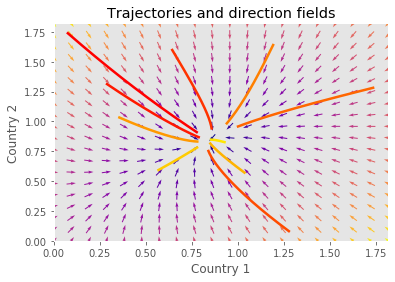

In [38]:
#stable = Richardson_model_tanh(2, 2, 1, 1, 1, 1)
#disarm = Richardson_model_tanh(5, 5, 2, 2, -1, -1)
unstable = Richardson_model_tanh(2, 2, 3, 3, 1, 1)

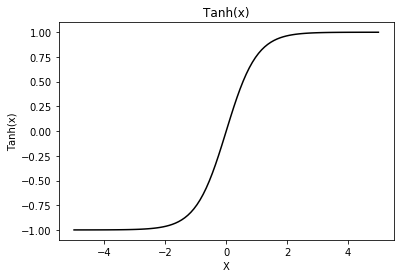

In [4]:
plt.plot(np.linspace(-5,5,100), np.tanh(np.linspace(-5,5,100)), color="black")
plt.title('Tanh(x)')
plt.ylabel('Tanh(x)')
plt.xlabel('X')
plt.savefig('tanh.png')